In [72]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint, RK45, solve_ivp

# Solución de ecuaciones diferenciales con Scipy

### Ejemplo de primer orden

Consideremos la EDO:

$$
\frac{dy}{dt} = -2ty, \quad y(0) = 1
$$

Aplicando el método RK4 con un tamaño de paso \( h = 0.1 \), podemos aproximar la solución numéricamente. 

In [73]:
def dy_dt(t,y):
    return -2 * t * y  # Ejemplo: dy/dt = -2ty

In [74]:
# Parámetros iniciales
t0 = 0  # Tiempo inicial
y0 = 1  # Valor inicial de y
h = 0.1  # Tamaño del paso
N = 50  # Número de pasos
tf=N*h+t0 #Tiempo final
t=np.linspace(t0,tf,200)

## Implementación en Scipy con odeint

In [75]:
y_odeint= odeint(dy_dt, y0, t)

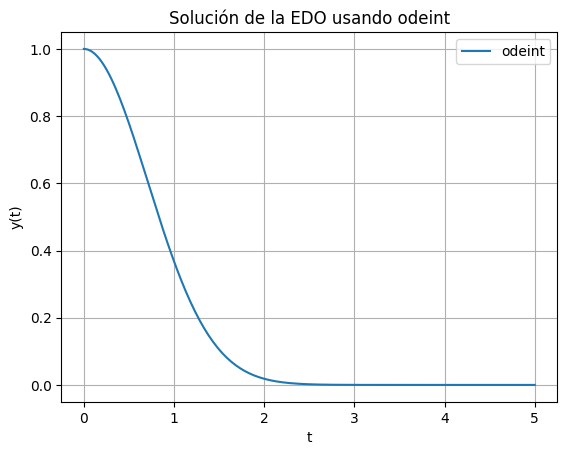

In [76]:
plt.plot(t, y_odeint, label='odeint')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la EDO usando odeint')
plt.legend()
plt.grid(True)
plt.show()

## Implementación en Scipy con RK45

In [77]:
y_RK45= RK45(dy_dt,t0, y0=[y0], t_bound=tf,max_step=0.1)
t_values=[t0]
y_values=[y0]

In [78]:
while y_RK45.status == 'running':
    y_RK45.step()
    t_values.append(y_RK45.t)
    y_values.append(y_RK45.y[0])

In [79]:
t_values = np.array(t_values)
y_values = np.array(y_values)


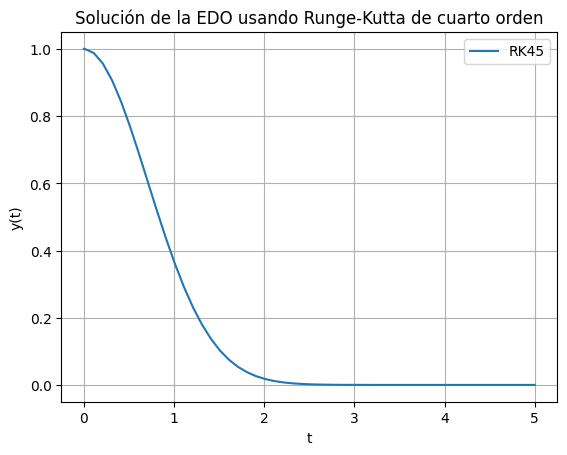

In [80]:
plt.plot(t_values, y_values, label='RK45')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la EDO usando Runge-Kutta de cuarto orden')
plt.legend()
plt.grid(True)
plt.show()

## Implementación en Scipy con solve_ivp

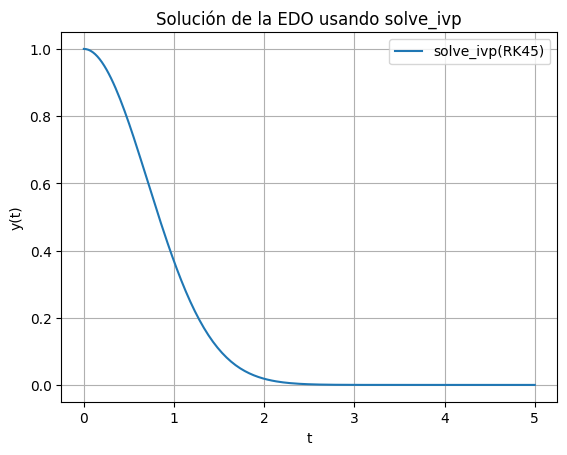

In [81]:
sol = solve_ivp(dy_dt, t_span=(t0,tf), y0=[y0], method='RK45', t_eval=t) #Método Runge Kutta

# Extraemos los resultados
t_ivp = sol.t
y_ivp = sol.y[0]

# Graficamos la solución
plt.plot(t_ivp, y_ivp, label='solve_ivp(RK45)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la EDO usando solve_ivp')
plt.legend()
plt.grid(True)
plt.show()

La solución analítica

$$
y=e^{-t^2}
$$

In [82]:
f_analitica=lambda t: np.exp(-t**2)

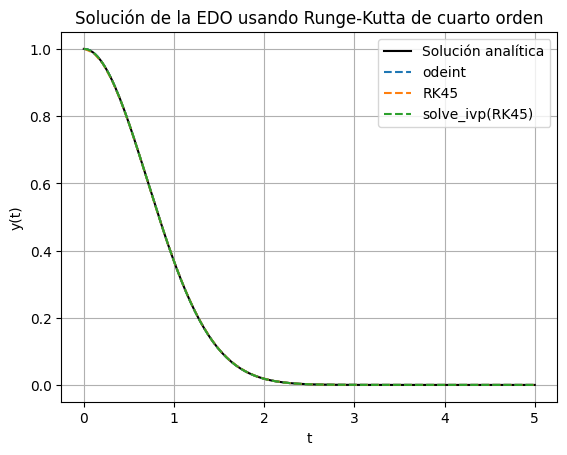

In [83]:
plt.plot(t, f_analitica(t), label='Solución analítica',c='k')
plt.plot(t, y_odeint, label='odeint', linestyle='--')
plt.plot(t_values, y_values, label='RK45', linestyle='--')
plt.plot(t_ivp, y_ivp, label='solve_ivp(RK45)', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la EDO usando Runge-Kutta de cuarto orden')
plt.legend()
plt.grid(True)
plt.show()

### Ejemplo de segundo orden

Supongamos ahora que tenemos una ecuación diferencial ordinaria de segundo orden, como la ecuación de un movimiento armónico simple amortiguado forzado,
$$
\quad y'' + 2 y' + 2 y = \cos(2x), \quad \quad y(0) = 0, \; y'(0) = 0
$$
Podemos convertir esto en dos ecuaciones de primer orden definiendo una nueva variable dependiente. Por ejemplo,
$$
\quad z \equiv y' \quad \Rightarrow \quad z' + 2 z + 2y = \cos(2x), \quad z(0)=y(0) = 0.
$$
Podemos resolver este sistema de ecuaciones diferenciales ordinarias utilizando con listas, de la siguiente manera:


## Implementación en Scipy con odeint

In [84]:
def dU_dx(U, x):
    """
    Derivada del vector U

    Parametros:
    U: vector tal que y=U[0] y z=U[1]
    x: Variable respecto a la que se deriva

    Retorna:
    [y',z']
    """
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]


In [85]:
U0 = [0, 0]
x0=0
xf=10
x = np.linspace(x0, xf, 200)

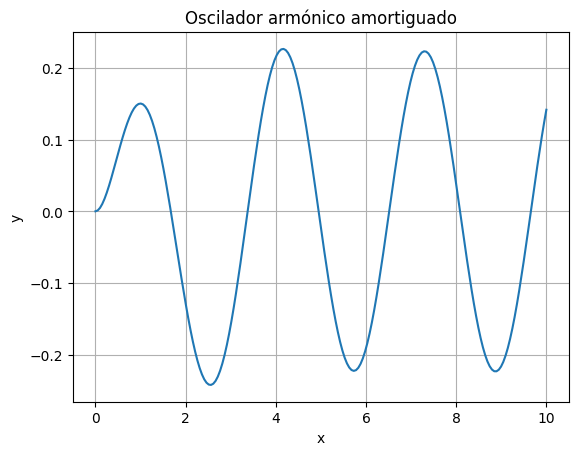

In [86]:
U_odeint = odeint(dU_dx, U0, x)
y_odeint = U_odeint[:,0]
plt.plot(x,y_odeint)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Oscilador armónico amortiguado")
plt.grid()
plt.show()

## Implementación en Scipy con solve_ivp

In [87]:
def dU_dx(x, U): #Cambiamos el orden de los parámetros
    """
    Derivada del vector U

    Parametros:
    U: vector tal que y=U[0] y z=U[1]
    x: Variable respecto a la que se deriva

    Retorna:
    [y,z]
    """
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]

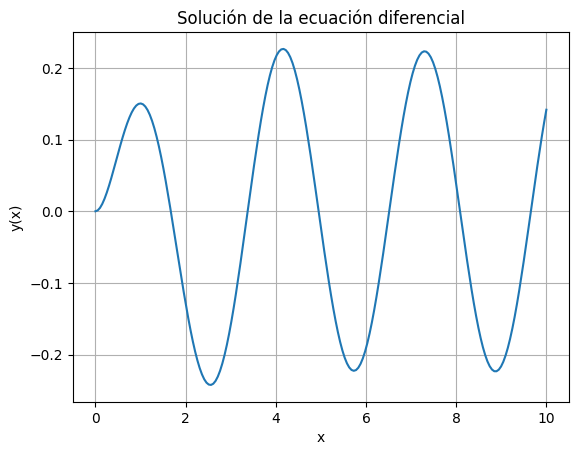

In [88]:
# Resolviendo el sistema de ecuaciones diferenciales
sol = solve_ivp(dU_dx, (x0,xf), U0, method='RK45', t_eval=x)

# Extraemos las soluciones
x_sol = sol.t
y_sol = sol.y[0]
z_sol = sol.y[1]

# Graficamos la solución
plt.plot(x_sol, y_sol)
#plt.plot(x_sol, z_sol, label="y'(x)")
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución de la ecuación diferencial')
plt.grid(True)
plt.show()

# Solución Punto 1 y 7 del Final

## 1 
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

In [89]:
#Parámetros
N0=1000 #Número inicial de átomos
t1_2=15 #En horas para el plutonio
lambda_=np.log(2)/t1_2
t_max=70 #Tiempo Máximo
dt=0.1 #Paso
t = np.arange(0, t_max, dt) #Arreglo de tiempo

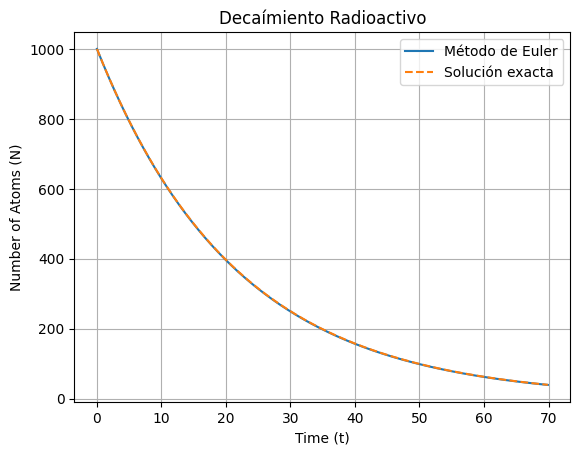

In [90]:
# Método de Euler
N_euler = np.zeros(len(t))
N_euler[0] = N0

for i in range(1, len(t)):
    dN = -lambda_ * N_euler[i-1] * dt
    N_euler[i] = N_euler[i-1] + dN

# Solución exacta
N_exact = N0 * np.exp(-lambda_ * t)

# Plot
plt.plot(t, N_euler, label="Método de Euler")
plt.plot(t, N_exact, label="Solución exacta", linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('Number of Atoms (N)')
plt.title('Decaímiento Radioactivo')
plt.legend()
plt.grid()
plt.show()

# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  

Para convertirlo en un sistema de primer orden, utilizamos la definición:
$$
\begin{aligned}
y_1 &= \theta_1, \\
y_2 &= \dot{\theta}_1, \\
y_3 &= \theta_2, \\
y_4 &= \dot{\theta}_2.
\end{aligned}
$$

Entonces, el sistema de primer orden queda:

$$
\begin{aligned}
\dot{y}_1 &= y_2, \\
\dot{y}_2 &= -\frac{g}{L}y_1 - \frac{k}{m}(y_1 - y_3), \\
\dot{y}_3 &= y_4, \\
\dot{y}_4 &= -\frac{g}{L}y_3 - \frac{k}{m}(y_3 - y_1).
\end{aligned}
$$

El sistema de ecuaciones diferenciales de primer orden puede escribirse en forma matricial como:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{y} = [y_1, y_2, y_3, y_4]^T$ y la matriz $\mathbf{A}$ es:

$$
\mathbf{A} = \begin{bmatrix}
0 & 1 & 0 & 0 \\
-\left(\frac{g}{L} + \frac{k}{m}\right) & 0 & \frac{k}{m} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{m} & 0 & -\left(\frac{g}{L} + \frac{k}{m}\right) & 0
\end{bmatrix}.
$$


In [91]:
# Parámetros del sistema
m = 1.0  # kg
L = 1.0  # m
g = 9.81  # m/s²
k = 0.5  # N/m

In [92]:
# Condiciones iniciales
y0 = np.array([0.1, 0.0, 0.0, 0.0])

In [93]:
# Intervalo de simulación
t_start = 0.0
t_end = 10.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

In [94]:
# Definición de la matriz A
A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/m), 0, k/m, 0],
    [0, 0, 0, 1],
    [k/m, 0, -(g/L + k/m), 0]
])

# Función para el sistema de ecuaciones diferenciales
def system(t, y):
    return A @ y


In [95]:
# Resolviendo el sistema de ecuaciones diferenciales
sol = solve_ivp(system, (t_start,t_end), y0, method='RK45', t_eval=t)

# Extraemos las soluciones
t_sol = sol.t
theta1_sol = sol.y[0]
theta1_dot_sol = sol.y[1]
theta2_sol = sol.y[2]
theta2_dot__sol = sol.y[3]

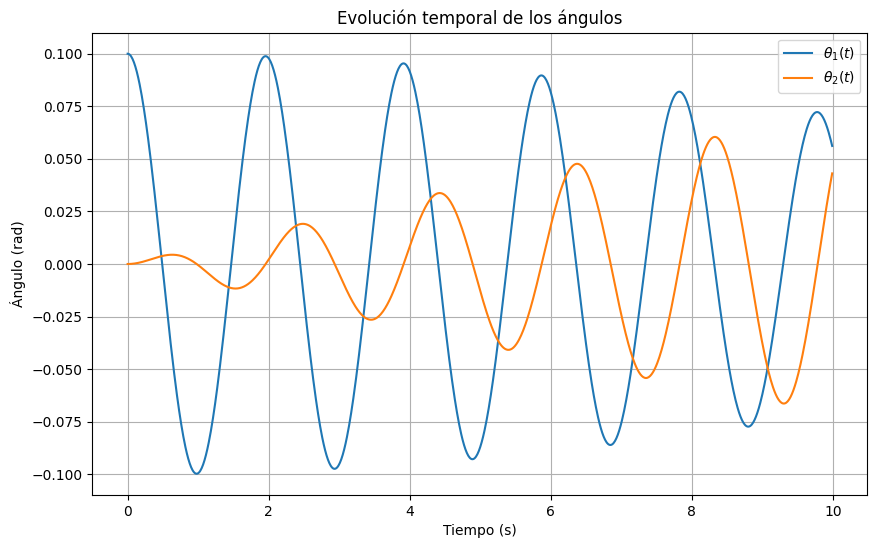

In [96]:
# Gráfica de la evolución temporal de los ángulos
plt.figure(figsize=(10, 6))
plt.plot(t, theta1_sol, label=r'$\theta_1(t)$')
plt.plot(t, theta2_sol, label=r'$\theta_2(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Evolución temporal de los ángulos')
plt.legend()
plt.grid()
plt.show()



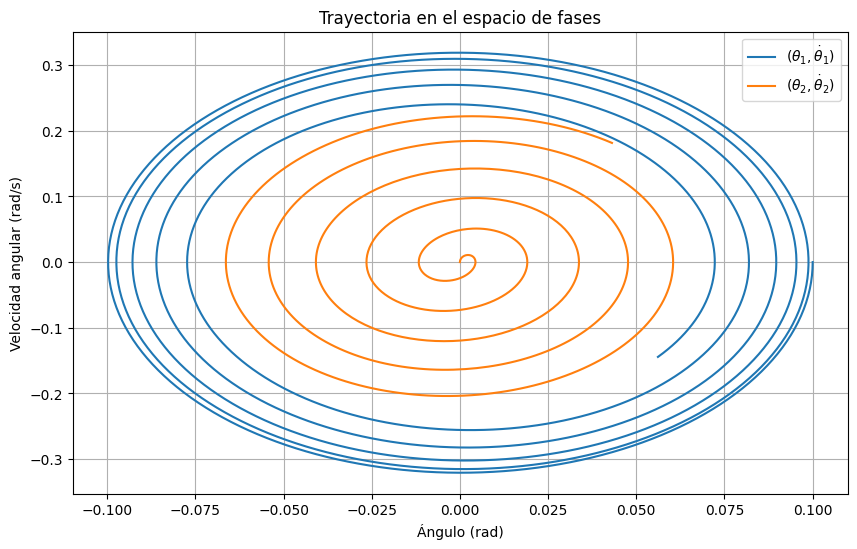

In [97]:
# Gráfica de la trayectoria en el espacio de fases
plt.figure(figsize=(10, 6))
plt.plot(theta1_sol, theta1_dot_sol, label=r'$(\theta_1, \dot{\theta}_1)$')
plt.plot(theta2_sol, theta2_dot__sol, label=r'$(\theta_2, \dot{\theta}_2)$')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Trayectoria en el espacio de fases')
plt.legend()
plt.grid()
plt.show()